In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('prediction_kakao_20_gephi.csv', encoding='utf-8-sig')

In [7]:
candidate=df['Target'].unique().tolist()

In [19]:
ipc_df = pd.read_csv('ipc_description_2024ver_maingroup_p.csv', encoding='utf-8-sig')
filtered_df = ipc_df[ipc_df['maingroup'].isin(candidate)]

In [44]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')
embeddings = model.encode(filtered_df['description'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [45]:
embeddings

array([[-0.37070212,  0.0264958 ,  0.16480121, ..., -0.05039575,
         0.19101258,  0.21691853],
       [-0.32793057, -0.08176885,  0.00440707, ...,  0.12643442,
        -0.49639073,  0.02890111],
       [-0.05398826, -0.23255098, -0.44281876, ...,  0.44541833,
         0.19171686,  0.03639613],
       ...,
       [-0.4187886 ,  0.09806563, -0.5025592 , ..., -0.56162465,
         0.08410331,  0.02306766],
       [-0.35904855, -0.4868346 , -0.04290102, ...,  0.06422301,
        -0.132256  , -0.2168928 ],
       [-0.11502842, -0.24724449,  0.15453793, ...,  0.29316142,
         0.2348146 , -0.05825179]], dtype=float32)

In [31]:
df = pd.read_csv('AI_patent_all.csv', encoding='utf-8-sig')  # 필요 시 encoding 변경

# 2. KakaoBank Corp.에 해당하는 특허 필터링
kakao_df = df[df['assignee'] == 'KakaoBank Corp.']

# 3. title과 abstract 컬럼만 추출
kakao_text_df = kakao_df[['title', 'abs']]

texts = (kakao_text_df['title'] + " " + kakao_text_df['abs']).tolist()

In [47]:
kakao_embeddings = model.encode(texts, show_progress_bar=True)  # shape: (5, 384)

# 4. 평균 벡터 계산
kakao_mean_embedding = np.mean(kakao_embeddings, axis=0)  # shape: (384,)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

# 1. 유사도 계산: 각 IPC (51개)와 Kakao 평균 임베딩 간 cosine similarity
similarities = cosine_similarity(embeddings, kakao_mean_embedding.reshape(1, -1))  # 결과: (51, 1)

# 2. 평탄화
similarities = similarities.squeeze()  # shape: (51,)

# 3. filtered_df에 추가
filtered_df['similarity_with_kakao'] = similarities

# 4. 확인
print(filtered_df[['maingroup', 'similarity_with_kakao']].head())

     maingroup  similarity_with_kakao
6419   G01R031               0.083659
6606   G05B013               0.122878
6609   G05B019               0.118580
6611   G05B023               0.192322
6614   G05D001               0.081111


C:\Users\user\AppData\Local\Temp\ipykernel_17672\325735652.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['similarity_with_kakao'] = similarities


In [50]:
filtered_df

,maingroup,description,similarity_with_kakao
6419,G01R031,Arrangements for testing electric properties; ...,0.083659
6606,G05B013,"Adaptive control systems, i.e. systems automat...",0.122878
6609,G05B019,Programme-control systems,0.118580
6611,G05B023,Testing or monitoring of control systems or pa...,0.192322
6614,G05D001,"Control of position, course, altitude or attit...",0.081111
6678,G06F003,Input arrangements for transferring data to be...,0.228655
6682,G06F009,"Arrangements for program control, e.g. control...",0.132682
6683,G06F011,Error detection; Error correction; Monitoring ...,0.291064
6687,G06F016,Information retrieval; Database structures the...,0.257743
6688,G06F017,Digital computing or data processing equipment...,0.371313


In [53]:
# 1. 예측 결과 불러오기
df = pd.read_csv("prediction_kakao_20_gephi.csv", encoding="utf-8-sig")

# 2. 인접 행렬 불러오기
adj_all_common = pd.read_csv("adj_all_common.csv", index_col=0)

# 3. Source-Target 실제 존재 여부 확인
def lookup_adj(row):
    src, tgt = row['Source'], row['Target']
    try:
        return adj_all_common.loc[src, tgt]
    except KeyError:
        return 0  # 인접행렬에 없으면 0으로 처리

df['observed_weight'] = df.apply(lookup_adj, axis=1)

In [55]:
# 평균 기준
target_score_mean = df.groupby('Target')['observed_weight'].mean().rename("y_observed_mean")

# 중앙값 기준
target_score_median = df.groupby('Target')['observed_weight'].median().rename("y_observed_median")

In [56]:
# mean 기준 병합
filtered_df = filtered_df.merge(target_score_mean, left_on='maingroup', right_index=True, how='left')

# 필요하면 median도 추가 병합
filtered_df = filtered_df.merge(target_score_median, left_on='maingroup', right_index=True, how='left')

In [63]:
filtered_df.to_csv('2d_scatterplot_kakao.csv', encoding='utf-8-sig')

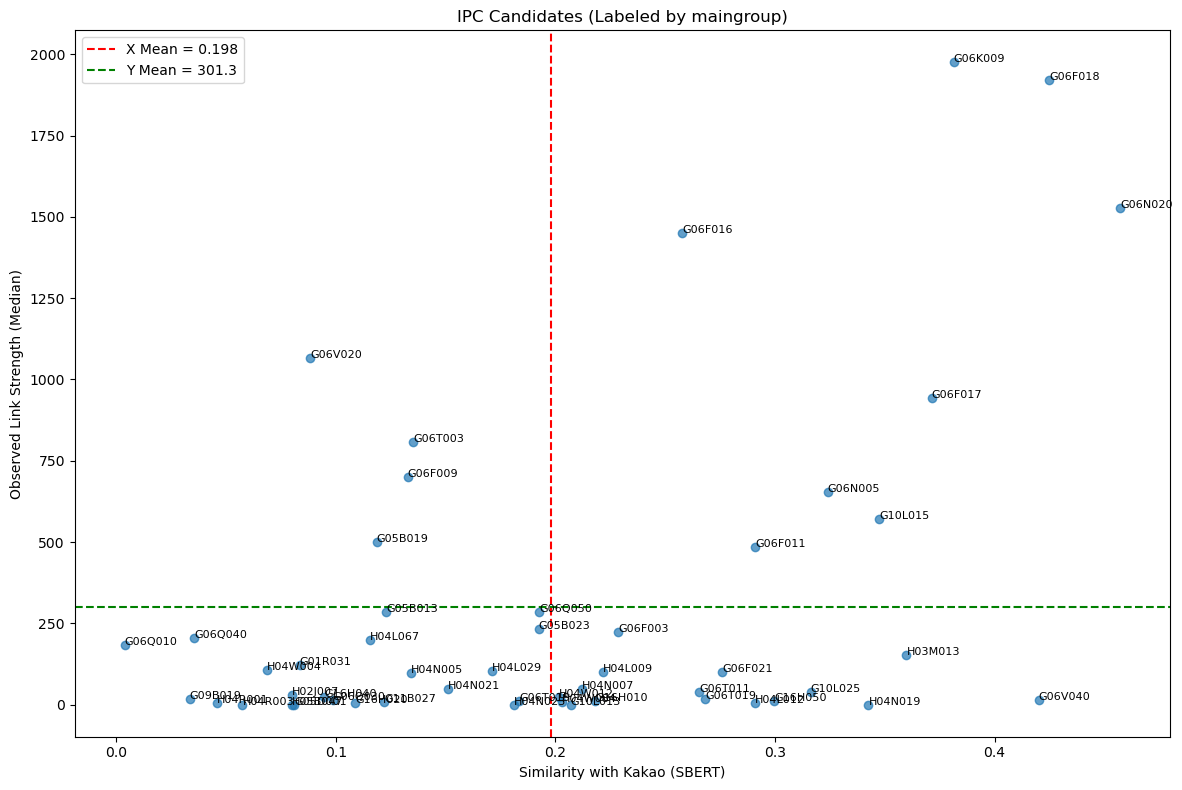

In [62]:
# filtered_df는 이전 단계에서 이미 만들어졌다고 가정하고 X, Y 정의
x = filtered_df['similarity_with_kakao']
y = filtered_df['y_observed_median']
y = filtered_df['y_observed_mean']
labels = filtered_df['maingroup']

# 평균 기준선
x_avg = x.mean()
y_avg = y.mean()

# 시각화
plt.figure(figsize=(12, 8))
plt.scatter(x, y, alpha=0.7)

# 기준선 표시 (평균)
plt.axvline(x=x_avg, color='red', linestyle='--', label=f'X Mean = {x_avg:.3f}')
plt.axhline(y=y_avg, color='green', linestyle='--', label=f'Y Mean = {y_avg:.1f}')

# 모든 노드에 라벨 부착
for i in range(len(filtered_df)):
    plt.text(x.iloc[i], y.iloc[i], labels.iloc[i], fontsize=8)

plt.xlabel('Similarity with Kakao (SBERT)')
plt.ylabel('Observed Link Strength (Median)')
plt.title('IPC Candidates (Labeled by maingroup)')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()